In [1]:
## Etape 0 : Importation des librairies
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import cv2


2022-12-04 19:14:39.106323: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 19:14:39.340271: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-04 19:14:39.404209: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-04 19:14:39.404225: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
## Etape 1 : Chargement des données
print("Chargement des données...")

def load_image(path: str):
    img = mpimg.imread(path)
    # resize image
    img = cv2.resize(img, (375, 500))
    return img


def loading_images(path: str):
    train_images = []
    train_labels = []
    test_images = []
    test_labels = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".jpg"):
                if "Train" in root:
                    train_images.append(load_image(root + '/' + file))
                    train_labels.append(root.split("/")[-1])
                else:
                    test_images.append(load_image(root + '/' + file))
                    test_labels.append(root.split("/")[-1])
    return train_images, train_labels, test_images, test_labels

train_images, train_labels, test_images, test_labels = loading_images("dataset")

print("Chargement des données terminé")

Chargement des données...
Chargement des données terminé


Affichage des données...


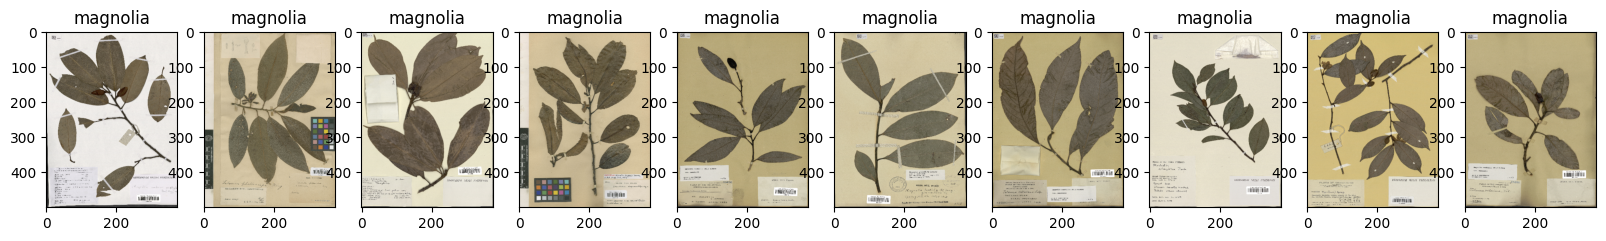

Affichage des données terminé


In [11]:
## Etape 2 : Affichage des données
print("Affichage des données...")

def show_images(images: list, labels: list, n: int):
    fig = plt.figure(figsize=(20, 20))
    for i in range(n):
        img = images[i]
        fig.add_subplot(1, n, i+1)
        plt.title(labels[i])
        plt.imshow(img.astype(np.uint8))
    plt.show()

show_images(train_images, train_labels, 10)

print("Affichage des données terminé")

In [ ]:
## Etape 3 : Data augmentation

print("Data augmentation...")

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest')


aug_train_images_generator = datagen.flow(np.array(train_images), np.array(train_labels))
aug_img, aug_lbl = aug_train_images_generator.next()
show_images(aug_img, aug_lbl, 5)

print("Data augmentation terminée")

In [23]:
## Etape 4 : Création du Dataset Avec augmentation

print("Dataset Augmentation ...")

def ajoute_n_batch_images(train_images, train_labels, generator, n):
    for _ in range(n):
        aug_img, aug_lbl = generator.next()
        train_images = np.concatenate((train_images, aug_img))
        train_labels = np.concatenate((train_labels, aug_lbl))
    return train_images, train_labels

train_images, train_labels = ajoute_n_batch_images(train_images, train_labels, aug_train_images_generator, 100)

print("Dataset Augmentation terminée")



Dataset Augmentation ...


: 

: 

In [22]:
print(train_images.__len__())

536
